In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('Dados de consumo.xlsx',parse_dates=['Data e Hora'])

In [3]:
df.head()

Data e Hora  Consumo(litros)  Valor Acumulado
0 2017-08-21 20:00:00               65               65
1 2017-08-21 21:00:00               81              146
2 2017-08-21 22:00:00               10              156
3 2017-08-21 23:00:00               12              168
4 2017-08-22 00:00:00               14              182

In [4]:
df.describe()

Consumo(litros)  Valor Acumulado
count      4033.000000      4033.000000
mean         28.234813     56183.710141
std          40.455402     32613.948469
min           0.000000        65.000000
25%           0.000000     27774.000000
50%          10.000000     56707.000000
75%          43.000000     83971.000000
max         550.000000    113871.000000

In [5]:
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'])
df['Data'] = df['Data e Hora'].dt.strftime('%d-%m-%Y')
df['Hora'] = df['Data e Hora'].dt.strftime('%H:%M:%S')
df['Semana'] = df['Data e Hora'].dt.strftime('%A')

In [6]:
df.head()

Data e Hora  Consumo(litros)  Valor Acumulado        Data      Hora  \
0 2017-08-21 20:00:00               65               65  21-08-2017  20:00:00   
1 2017-08-21 21:00:00               81              146  21-08-2017  21:00:00   
2 2017-08-21 22:00:00               10              156  21-08-2017  22:00:00   
3 2017-08-21 23:00:00               12              168  21-08-2017  23:00:00   
4 2017-08-22 00:00:00               14              182  22-08-2017  00:00:00   

    Semana  
0   Monday  
1   Monday  
2   Monday  
3   Monday  
4  Tuesday

In [7]:
del df['Data e Hora']

In [8]:
df.head()

Consumo(litros)  Valor Acumulado        Data      Hora   Semana
0               65               65  21-08-2017  20:00:00   Monday
1               81              146  21-08-2017  21:00:00   Monday
2               10              156  21-08-2017  22:00:00   Monday
3               12              168  21-08-2017  23:00:00   Monday
4               14              182  22-08-2017  00:00:00  Tuesday

In [9]:
df.tail()

Consumo(litros)  Valor Acumulado        Data      Hora  Semana
4028                0           113778  18-05-2018  06:00:00  Friday
4029                0           113778  18-05-2018  06:00:00  Friday
4030               65           113843  18-05-2018  07:00:00  Friday
4031               28           113871  18-05-2018  08:00:00  Friday
4032                0           113871  18-05-2018  08:00:00  Friday

In [10]:
df.describe()

Consumo(litros)  Valor Acumulado
count      4033.000000      4033.000000
mean         28.234813     56183.710141
std          40.455402     32613.948469
min           0.000000        65.000000
25%           0.000000     27774.000000
50%          10.000000     56707.000000
75%          43.000000     83971.000000
max         550.000000    113871.000000

In [11]:
df=df[['Data','Hora','Semana','Consumo(litros)','Valor Acumulado']]

In [12]:
df.index

RangeIndex(start=0, stop=4033, step=1)

In [13]:
df.head()

Data      Hora   Semana  Consumo(litros)  Valor Acumulado
0  21-08-2017  20:00:00   Monday               65               65
1  21-08-2017  21:00:00   Monday               81              146
2  21-08-2017  22:00:00   Monday               10              156
3  21-08-2017  23:00:00   Monday               12              168
4  22-08-2017  00:00:00  Tuesday               14              182

In [14]:
df2=df.drop([1])

In [15]:
df2.head()

Data      Hora   Semana  Consumo(litros)  Valor Acumulado
0  21-08-2017  20:00:00   Monday               65               65
2  21-08-2017  22:00:00   Monday               10              156
3  21-08-2017  23:00:00   Monday               12              168
4  22-08-2017  00:00:00  Tuesday               14              182
5  22-08-2017  01:00:00  Tuesday                8              190

In [16]:
df.tail(15)

Data      Hora    Semana  Consumo(litros)  Valor Acumulado
4018  17-05-2018  21:00:00  Thursday               66           113648
4019  17-05-2018  22:00:00  Thursday               42           113690
4020  17-05-2018  23:00:00  Thursday               71           113761
4021  18-05-2018  00:00:00    Friday               17           113778
4022  18-05-2018  01:00:00    Friday                0           113778
4023  18-05-2018  02:00:00    Friday                0           113778
4024  18-05-2018  03:00:00    Friday                0           113778
4025  18-05-2018  04:00:00    Friday                0           113778
4026  18-05-2018  05:00:00    Friday                0           113778
4027  18-05-2018  05:00:00    Friday                0           113778
4028  18-05-2018  06:00:00    Friday                0           113778
4029  18-05-2018  06:00:00    Friday                0           113778
4030  18-05-2018  07:00:00    Friday               65           113843
4031  18-05-2018  08:00:00    Friday               28           113871
4032  18-05-2018  08:00:00    Friday                0           113871

In [17]:
df=df.drop([0,1,2,3,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032])

In [18]:
df.head()

Data      Hora   Semana  Consumo(litros)  Valor Acumulado
4  22-08-2017  00:00:00  Tuesday               14              182
5  22-08-2017  01:00:00  Tuesday                8              190
6  22-08-2017  02:00:00  Tuesday                0              190
7  22-08-2017  03:00:00  Tuesday                0              190
8  22-08-2017  04:00:00  Tuesday                0              190

In [19]:
df.tail()

Data      Hora    Semana  Consumo(litros)  Valor Acumulado
4016  17-05-2018  19:00:00  Thursday              122           113506
4017  17-05-2018  20:00:00  Thursday               76           113582
4018  17-05-2018  21:00:00  Thursday               66           113648
4019  17-05-2018  22:00:00  Thursday               42           113690
4020  17-05-2018  23:00:00  Thursday               71           113761

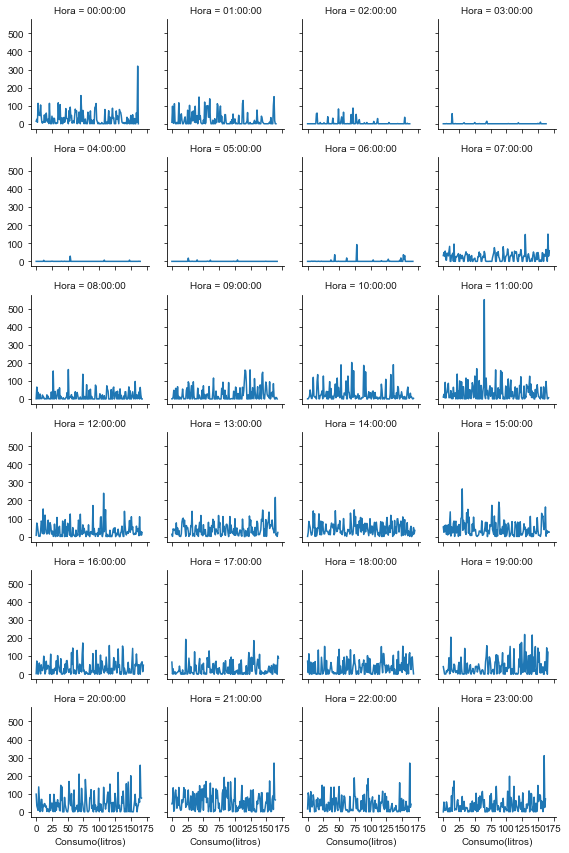

In [20]:
g = sns.FacetGrid(df, col='Hora',col_wrap=4, height=2)
g.map(plt.plot, 'Consumo(litros)')
#g.grid(True)
sns.set(style="whitegrid", font_scale=0.25)
g.savefig('tentativa')

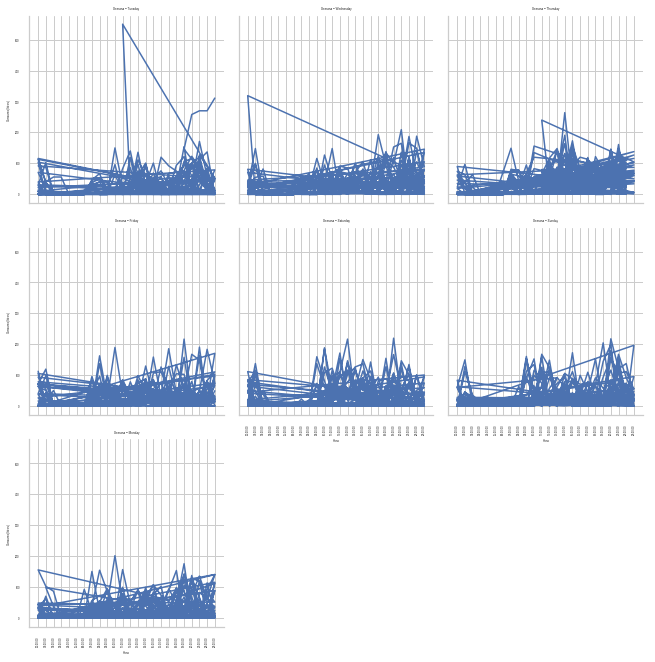

In [21]:
g = sns.FacetGrid(df, col='Semana',col_wrap=3, height=3)
g.map(plt.plot, 'Hora','Consumo(litros)')
sns.set(style="whitegrid", font_scale=0.75)
g.set_xticklabels(rotation=90)
g.savefig('tentativa1')

correlação

In [22]:
df.corr()

Consumo(litros)  Valor Acumulado
Consumo(litros)         1.000000         0.020221
Valor Acumulado         0.020221         1.000000

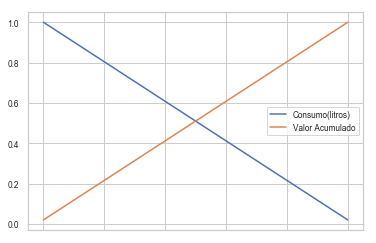

In [23]:
df[['Consumo(litros)','Valor Acumulado']].corr().plot()

correlação não linear

In [24]:
df.corr('spearman')

Consumo(litros)  Valor Acumulado
Consumo(litros)         1.000000        -0.019206
Valor Acumulado        -0.019206         1.000000

C:\Users\Natanael\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


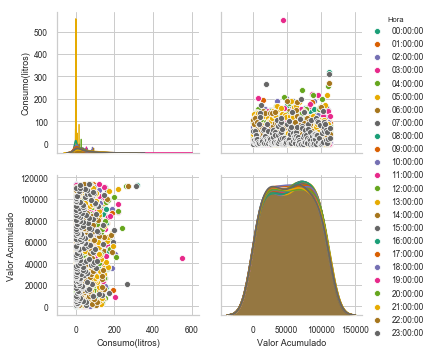

In [25]:
sns.pairplot(df,hue='Hora',palette="Dark2")

C:\Users\Natanael\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


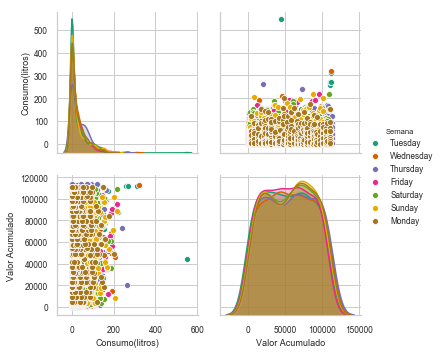

In [26]:
sns.pairplot(df,hue='Semana',palette="Dark2")

sns.pairplot(df,vars=["Semana", "Hora"])

C:\Users\Natanael\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


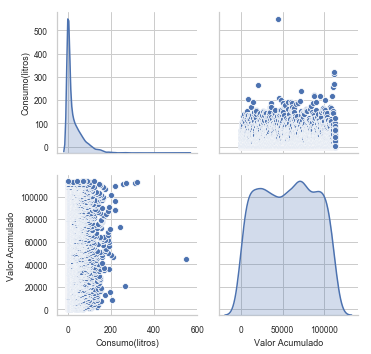

In [27]:
sns.pairplot(df, diag_kind="kde")

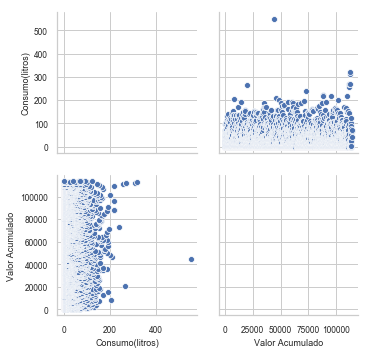

In [28]:
sns.pairplot(df, diag_kind="reg")

In [29]:
df_pivot_table=df.pivot_table(df,index=['Data','Semana'])
df_pivot_table.head()

Consumo(litros)  Valor Acumulado
Data       Semana                                    
01-02-2018 Thursday        34.875000     55103.583333
01-03-2018 Thursday        39.500000     72648.791667
01-04-2018 Sunday          31.458333     92193.125000
01-09-2017 Friday          18.500000      6859.333333
01-10-2017 Sunday          22.416667     26884.041667

plt.figure(figsize=(15,5))
plt.plot()

plt.figure(figsize=(15,5))
plt.plot(df['Semana']=='Monday', df['Consumo(litros)'])

plt.figure(figsize=(15,5))
plt.plot( df['Consumo(litros)'])

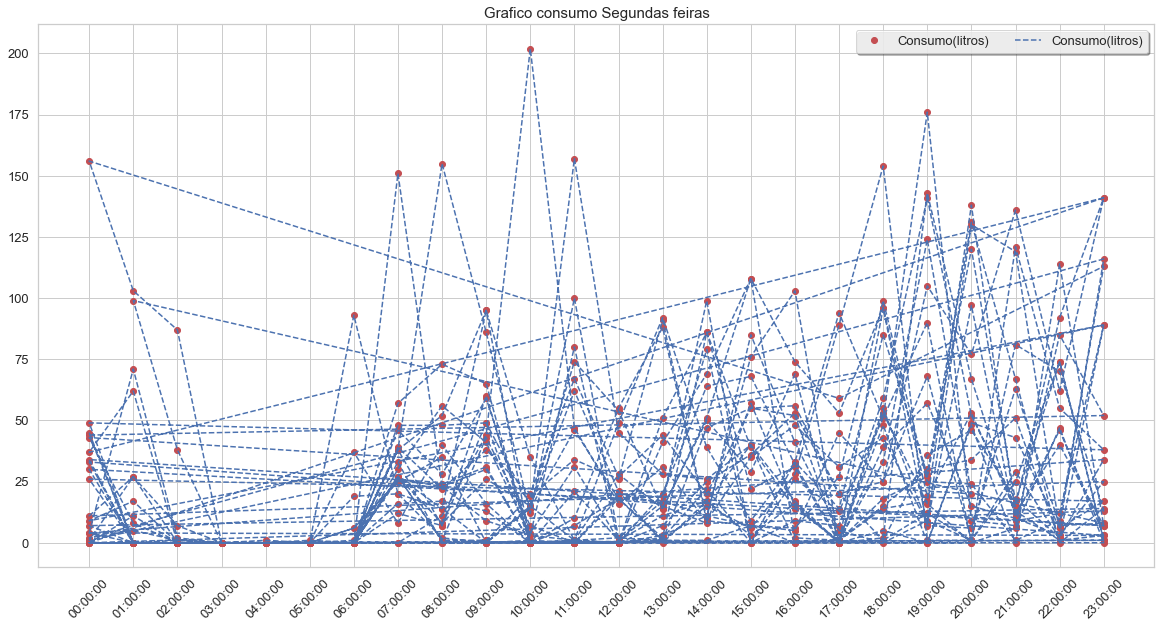

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Monday'], df['Consumo(litros)'][df['Semana']=='Monday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Monday'], df['Consumo(litros)'][df['Semana']=='Monday'],'b--')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo Segundas feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo Segundas feiras.png')


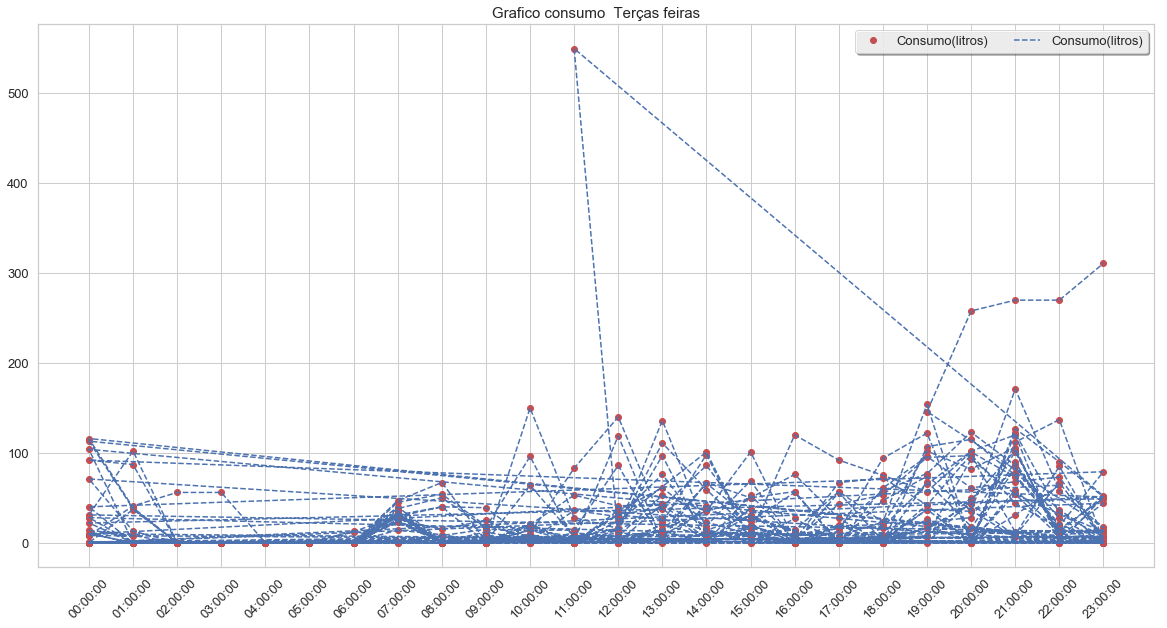

In [31]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Tuesday'], df['Consumo(litros)'][df['Semana']=='Tuesday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Tuesday'], df['Consumo(litros)'][df['Semana']=='Tuesday'],'b--')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Terças feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo  Terças feiras.png')

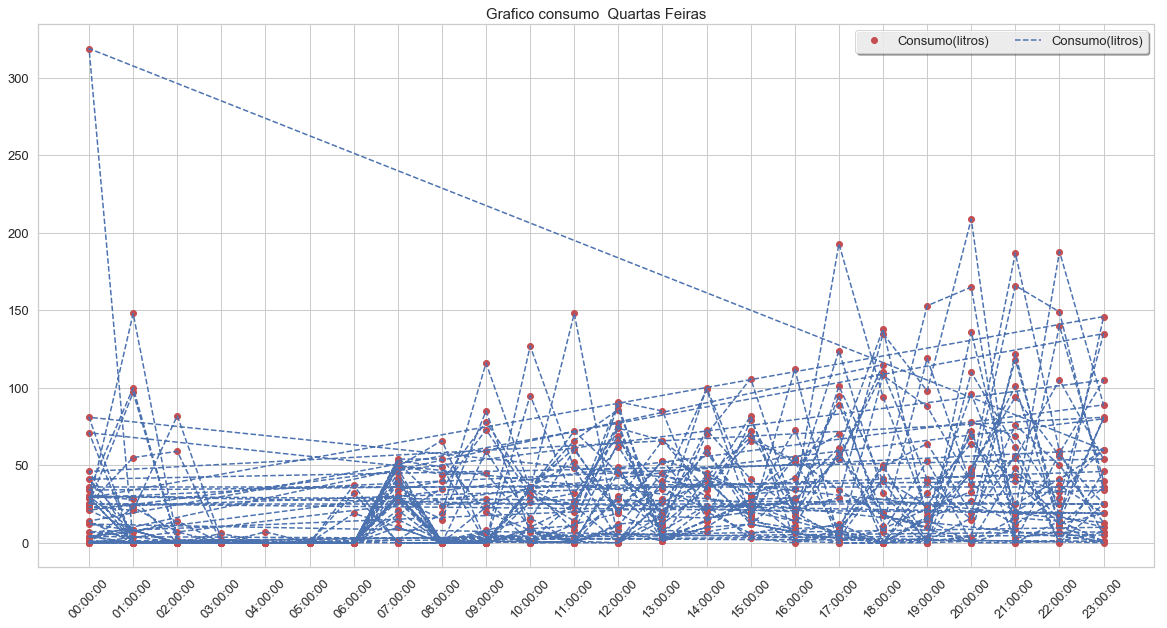

In [32]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Wednesday'], df['Consumo(litros)'][df['Semana']=='Wednesday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Wednesday'], df['Consumo(litros)'][df['Semana']=='Wednesday'],'b--')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Quartas Feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo  Quartas Feiras.png')

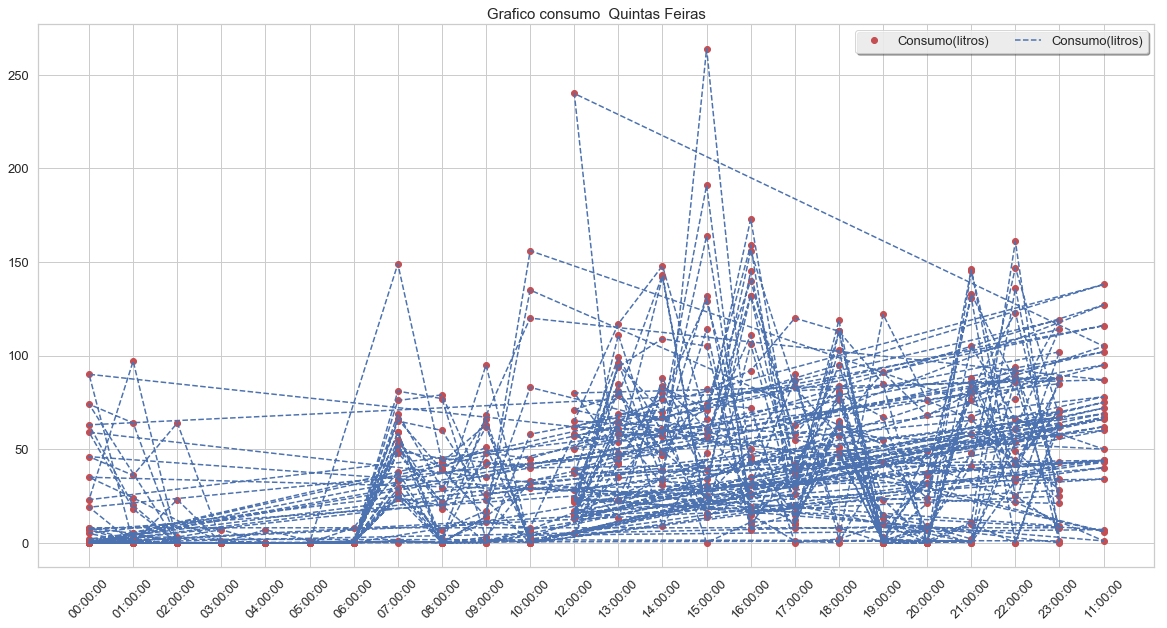

In [33]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Thursday'], df['Consumo(litros)'][df['Semana']=='Thursday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Thursday'], df['Consumo(litros)'][df['Semana']=='Thursday'],'b--')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Quintas Feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo  Quintas Feiras.png')

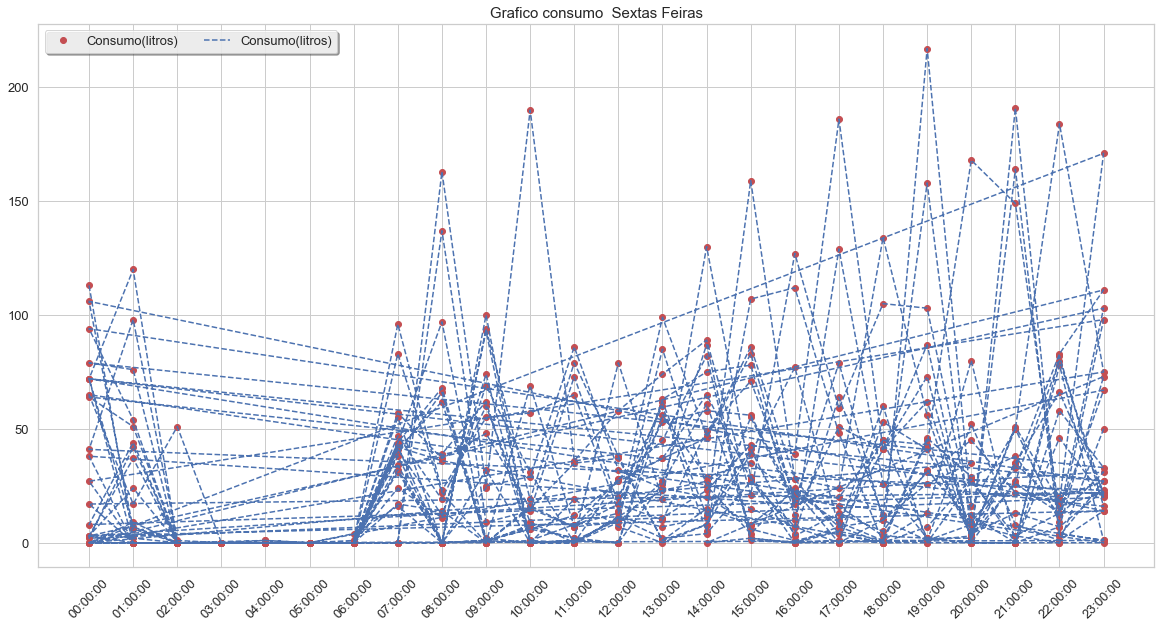

In [34]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Friday'], df['Consumo(litros)'][df['Semana']=='Friday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Friday'], df['Consumo(litros)'][df['Semana']=='Friday'],'b--')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Sextas Feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo  Sextas Feiras.png')

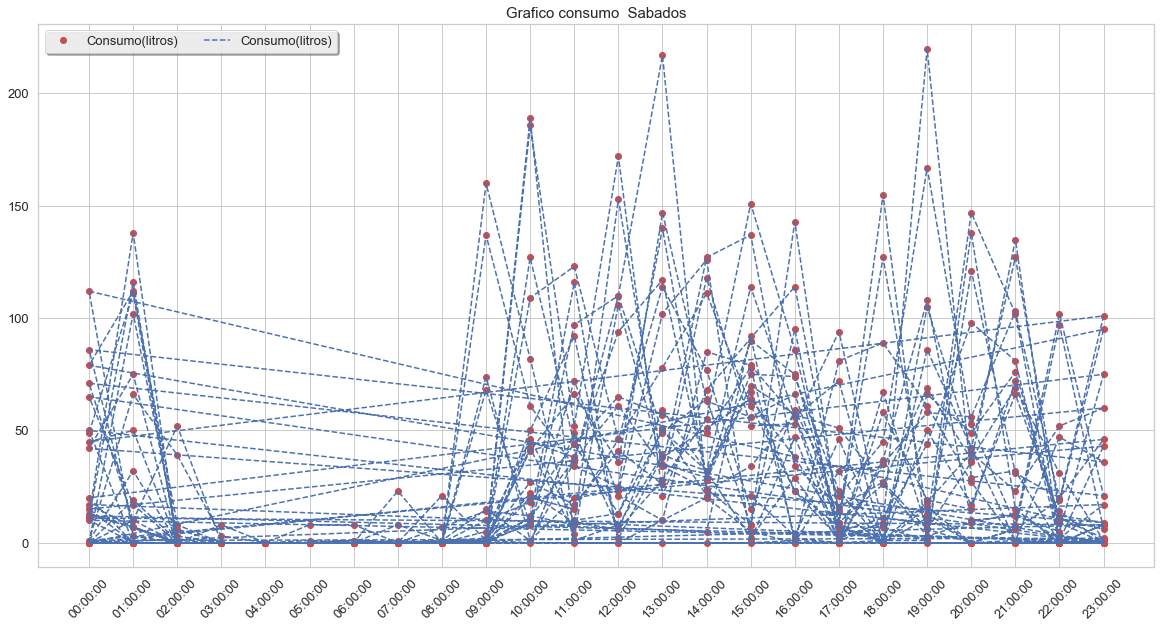

In [35]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Saturday'], df['Consumo(litros)'][df['Semana']=='Saturday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Saturday'], df['Consumo(litros)'][df['Semana']=='Saturday'],'b--')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Sabados',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo  Sabados.png')

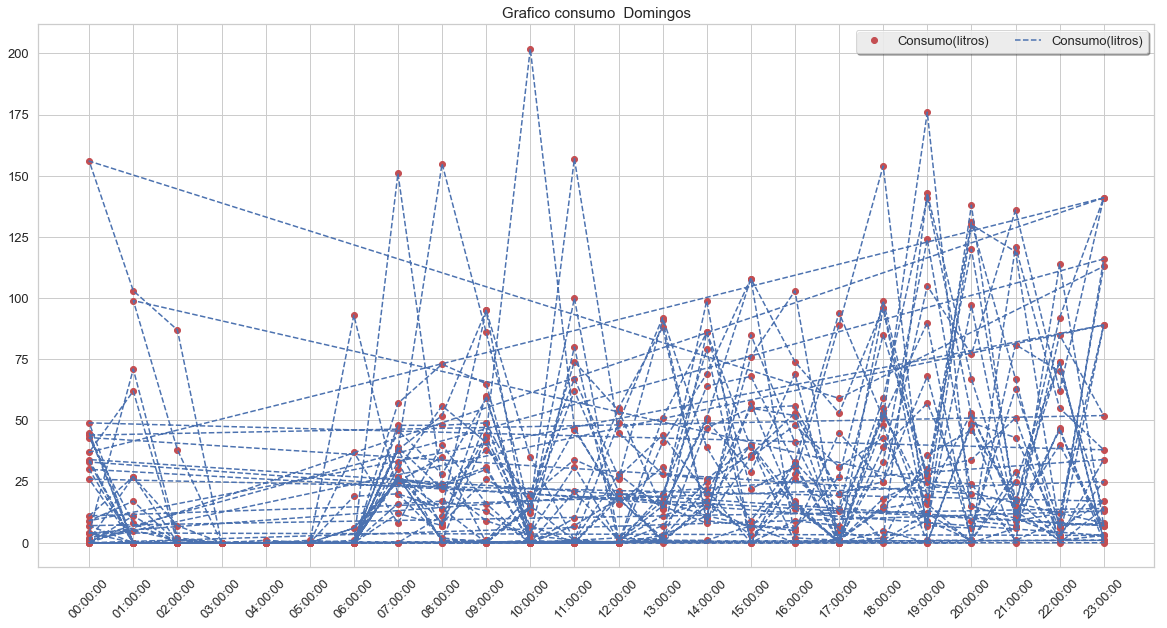

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Monday'], df['Consumo(litros)'][df['Semana']=='Monday'],'ro')
plt.plot(df['Hora'][df['Semana']=='Monday'], df['Consumo(litros)'][df['Semana']=='Monday'],'b--')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Domingos',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico consumo  Domingos.png')

In [37]:
df['Data'][df['Semana']=='Monday'].head()

147    28-08-2017
148    28-08-2017
149    28-08-2017
150    28-08-2017
151    28-08-2017
Name: Data, dtype: object

In [38]:
df['Data'][df['Semana']=='Tuesday'].head()

4    22-08-2017
5    22-08-2017
6    22-08-2017
7    22-08-2017
8    22-08-2017
Name: Data, dtype: object

In [39]:
df['Data'][df['Semana']=='Tuesday'].tail()

3968    15-05-2018
3969    15-05-2018
3970    15-05-2018
3971    15-05-2018
3972    15-05-2018
Name: Data, dtype: object

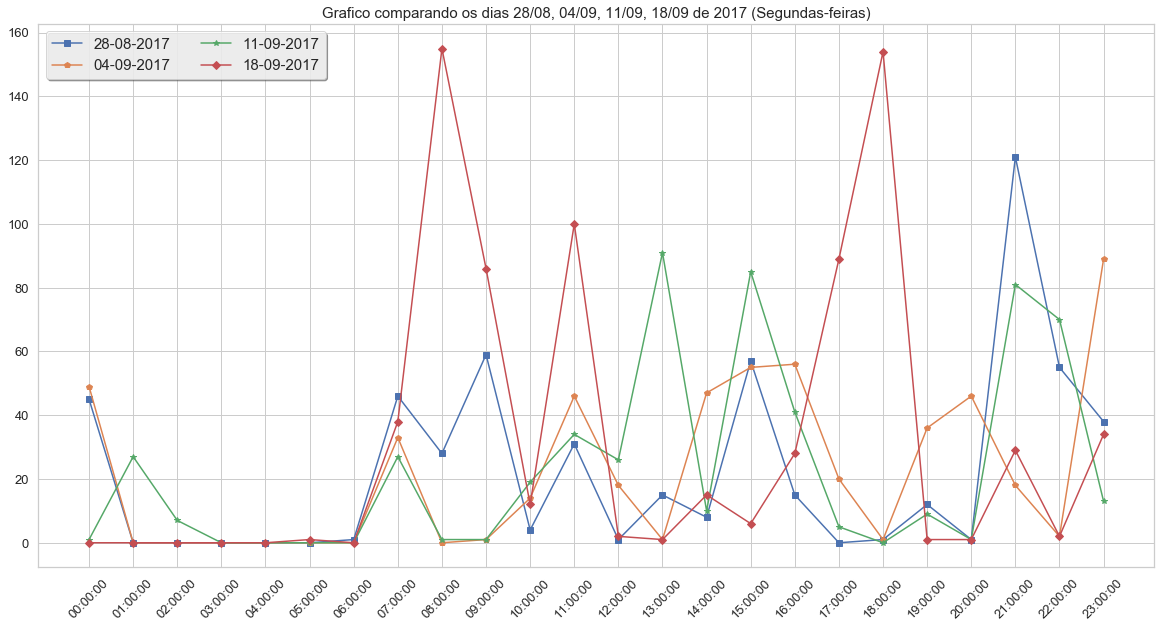

In [40]:
plt.figure(figsize=(20,10))
#plt.plot(df['Hora'][df['Data']=='2017-08-21'], df['Consumo(litros)'][df['Data']=='2017-08-21'])
plt.plot(df['Hora'][df['Data']=='28-08-2017'], df['Consumo(litros)'][df['Data']=='28-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='04-09-2017'], df['Consumo(litros)'][df['Data']=='04-09-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='11-09-2017'], df['Consumo(litros)'][df['Data']=='11-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='18-09-2017'], df['Consumo(litros)'][df['Data']=='18-09-2017'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.legend(["28-08-2017", "04-09-2017",'11-09-2017','18-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='15').get_frame().set_alpha(0.8)
#plt.legend( ["2017-08-28", "2017-09-04",'2017-09-11','2017-09-18'])
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 28/08, 04/09, 11/09, 18/09 de 2017 (Segundas-feiras)',fontsize='15')
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias 28-08, 04-09, 11-09, 18-09 de 2017  (Segundas-feiras).png')


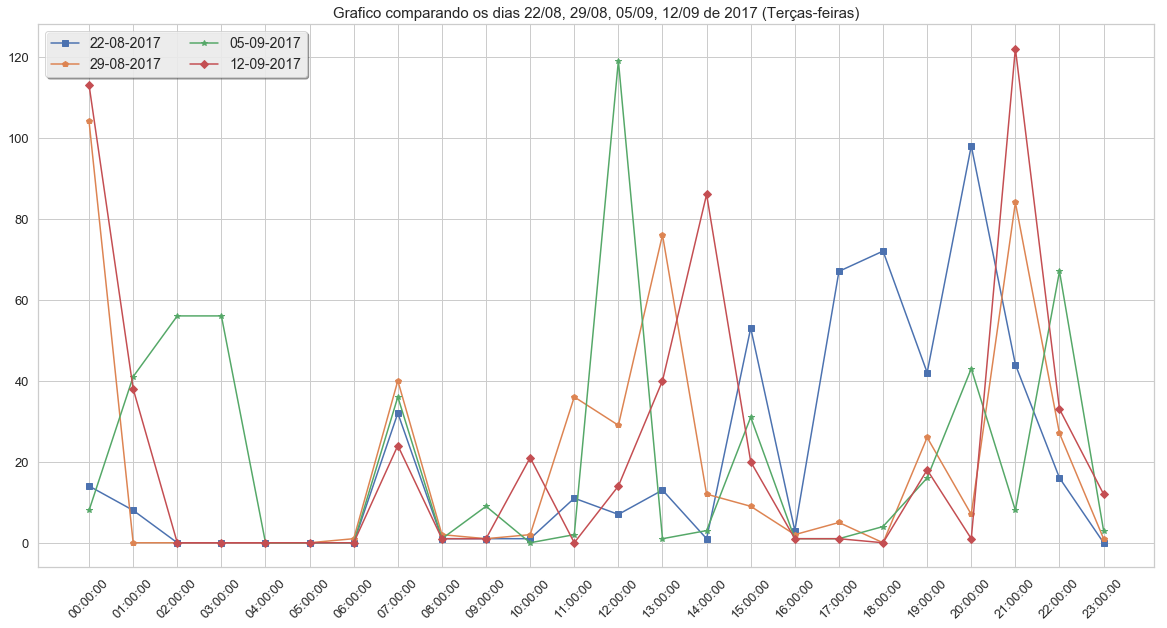

In [41]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='22-08-2017'], df['Consumo(litros)'][df['Data']=='22-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='29-08-2017'], df['Consumo(litros)'][df['Data']=='29-08-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='05-09-2017'], df['Consumo(litros)'][df['Data']=='05-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='12-09-2017'], df['Consumo(litros)'][df['Data']=='12-09-2017'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 22/08, 29/08, 05/09, 12/09 de 2017 (Terças-feiras)',fontsize='15')
plt.legend(["22-08-2017", "29-08-2017",'05-09-2017','12-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias 22-08, 29-08, 05-09, 12-09 de 2017 (Terças-feiras).png')

plt.figure(figsize=(20,5))
for i in df['Data']:
    for e in df['Semana']:
        if e == 'Monday':
            plt.plot(df['Hora'][df['Data']==i], df['Consumo(litros)'][df['Data']==i])

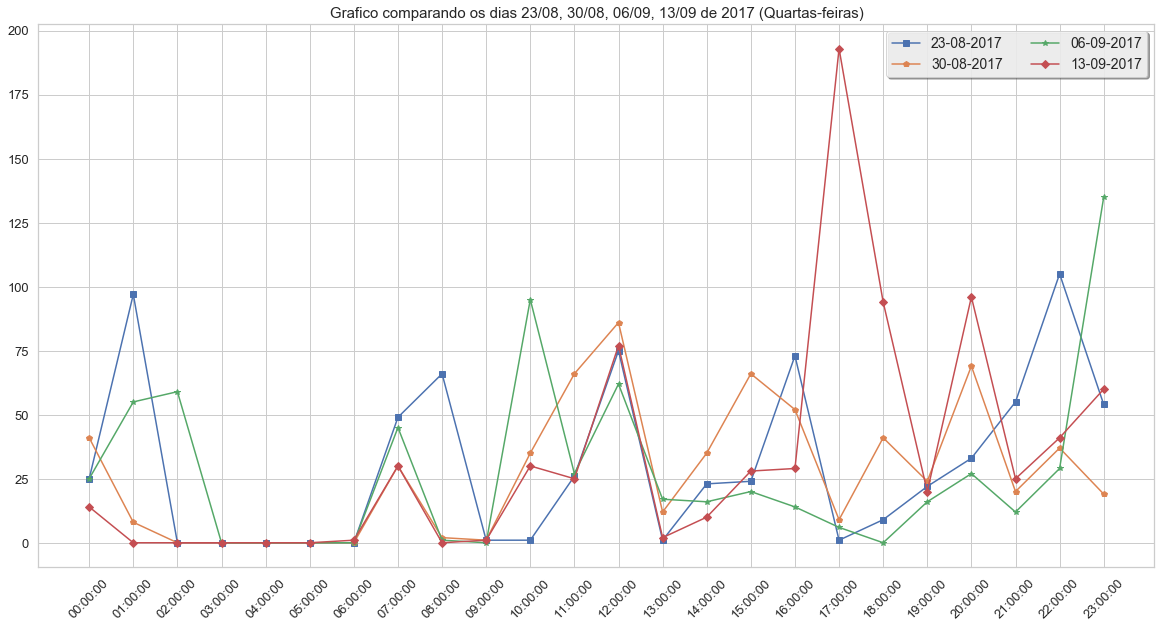

In [42]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='23-08-2017'], df['Consumo(litros)'][df['Data']=='23-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='30-08-2017'], df['Consumo(litros)'][df['Data']=='30-08-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='06-09-2017'], df['Consumo(litros)'][df['Data']=='06-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='13-09-2017'], df['Consumo(litros)'][df['Data']=='13-09-2017'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 23/08, 30/08, 06/09, 13/09 de 2017 (Quartas-feiras)',fontsize='15')
plt.legend(["23-08-2017", "30-08-2017",'06-09-2017','13-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias 23-08, 30-08, 06-09, 13-09 de 2017 (Quartas-feiras.png')

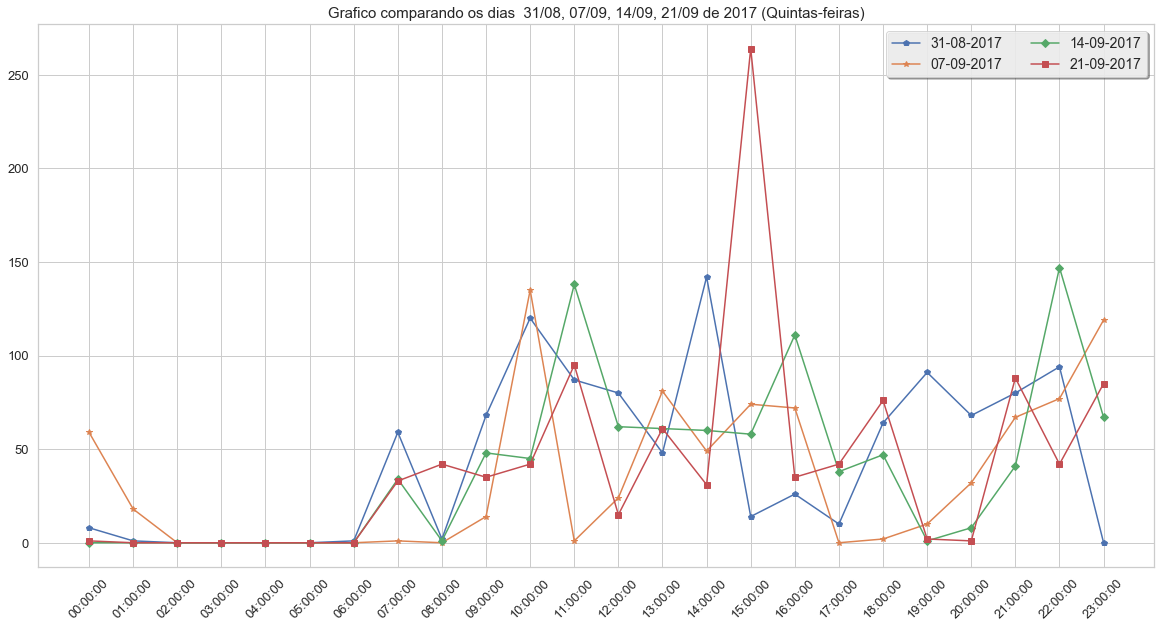

In [43]:
plt.figure(figsize=(20,10))
#ver esse dia 24/08
#plt.plot(df['Hora'][df['Data']=='24-08-2017'], df['Consumo(litros)'][df['Data']=='24-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='31-08-2017'], df['Consumo(litros)'][df['Data']=='31-08-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='07-09-2017'], df['Consumo(litros)'][df['Data']=='07-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='14-09-2017'], df['Consumo(litros)'][df['Data']=='14-09-2017'],marker='D')
plt.plot(df['Hora'][df['Data']=='21-09-2017'], df['Consumo(litros)'][df['Data']=='21-09-2017'],marker='s')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias  31/08, 07/09, 14/09, 21/09 de 2017 (Quintas-feiras)',fontsize='15')
plt.legend(["31-08-2017", "07-09-2017",'14-09-2017','21-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias  31-08, 07-09, 14-09, 21-09 de 2017 (Quintas-feiras).png')

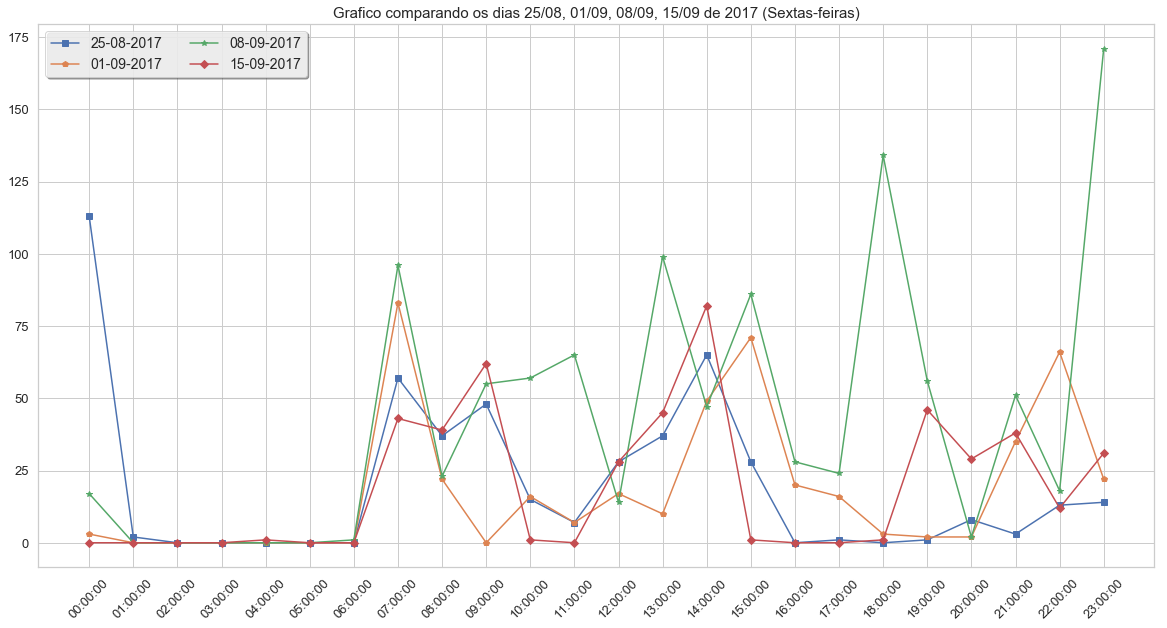

In [44]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='25-08-2017'], df['Consumo(litros)'][df['Data']=='25-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='01-09-2017'], df['Consumo(litros)'][df['Data']=='01-09-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='08-09-2017'], df['Consumo(litros)'][df['Data']=='08-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='15-09-2017'], df['Consumo(litros)'][df['Data']=='15-09-2017'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 25/08, 01/09, 08/09, 15/09 de 2017 (Sextas-feiras)',fontsize='15')
plt.legend(["25-08-2017", "01-09-2017",'08-09-2017','15-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias 25-08, 01-09, 08-09, 15-09 de 2017 (Sextas-feiras).png')

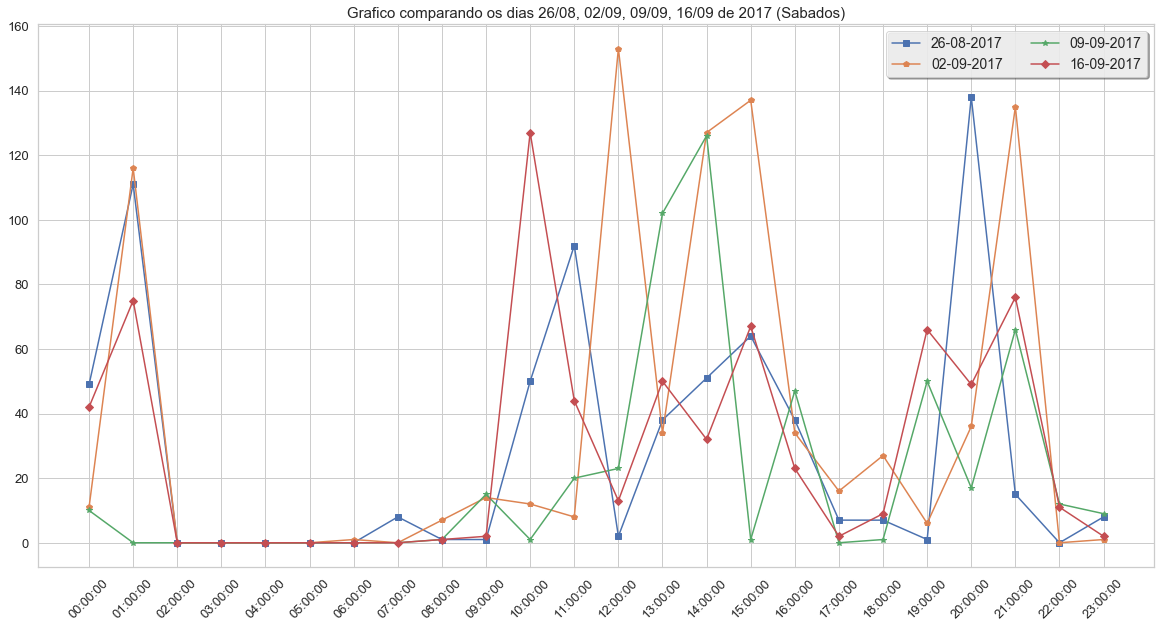

In [45]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='26-08-2017'], df['Consumo(litros)'][df['Data']=='26-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='02-09-2017'], df['Consumo(litros)'][df['Data']=='02-09-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='09-09-2017'], df['Consumo(litros)'][df['Data']=='09-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='16-09-2017'], df['Consumo(litros)'][df['Data']=='16-09-2017'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks( rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 26/08, 02/09, 09/09, 16/09 de 2017 (Sabados)',fontsize='15')
plt.legend(["26-08-2017", "02-09-2017",'09-09-2017','16-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias 26-08, 02-09, 09-09, 16-09 de 2017 (Sabados).png')

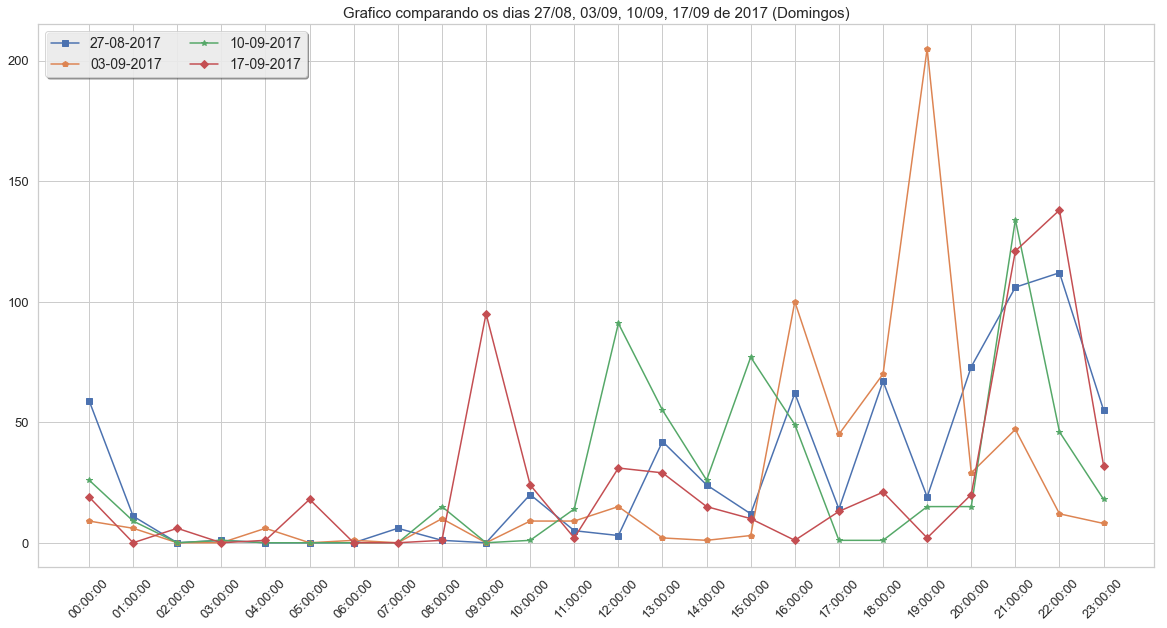

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='27-08-2017'], df['Consumo(litros)'][df['Data']=='27-08-2017'],marker='s')
plt.plot(df['Hora'][df['Data']=='03-09-2017'], df['Consumo(litros)'][df['Data']=='03-09-2017'],marker='p')
plt.plot(df['Hora'][df['Data']=='10-09-2017'], df['Consumo(litros)'][df['Data']=='10-09-2017'],marker='*')
plt.plot(df['Hora'][df['Data']=='17-09-2017'], df['Consumo(litros)'][df['Data']=='17-09-2017'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks( rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 27/08, 03/09, 10/09, 17/09 de 2017 (Domingos)',fontsize='15')
plt.legend(["27-08-2017", "03-09-2017",'10-09-2017','17-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('Grafico comparando os dias 27-08, 03-09, 10-09, 17-09 de 2017 (Domingos).png')

In [47]:
a=df.loc[291:458,'Hora']#03-09; 06/09

a=[]
for i in df.loc[291:458,'Hora']:
    a.append(i)
print (a)


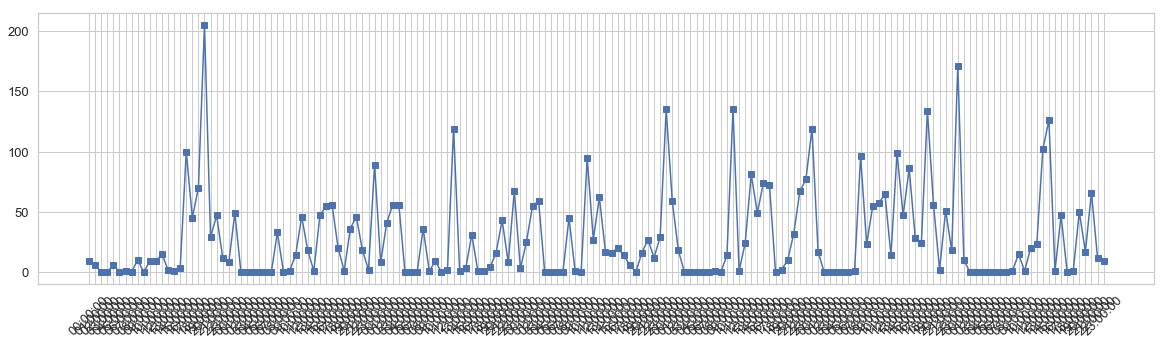

In [50]:
a=[]
for i in df.loc[291:458,'Hora']:
    a.append(i)
b=[]
for di in df.loc[291:458,'Consumo(litros)']:
    b.append(di)

plt.figure(figsize=(20,5))
plt.plot( b,marker='s')
#plt.plot(df.loc[459:626,'Hora'], df.loc[459:626,'Consumo(litros)'],marker='p')

plt.grid(True)
plt.xticks( np.arange(len(a)),a,rotation=45,fontsize='13')
plt.yticks(fontsize='13')
#plt.title('Grafico comparando os dias 26/08, 02/09, 09/09, 16/09 de 2017 (Sabados)',fontsize='15')
#plt.legend(["26-08-2017", "02-09-2017",'09-09-2017','16-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('S.png')

In [51]:
from scipy.spatial import distance
a= df.loc[291:458,'Consumo(litros)']
b= df.loc[459:626,'Consumo(litros)']


dst = distance.euclidean(a, b)
print('Distancia Euclidiana: {:.2f}' .format(dst))

Distancia Euclidiana: 610.88


In [52]:
df.loc[458,'Consumo(litros)']
df.loc[626,'Consumo(litros)']

2

a= df.loc[291:458,'Consumo(litros)']
b= df.loc[459:626,'Consumo(litros)']
i=0
c=[]
while i< len(a) :
    c.append(a[291+i])
    i+=1
print(c)

a= df.loc[291:458,'Consumo(litros)']
b= df.loc[459:626,'Consumo(litros)']
i=0
c=[]
while i< len(b) :
    c.append(b[459+i])
    i+=1
print(c)

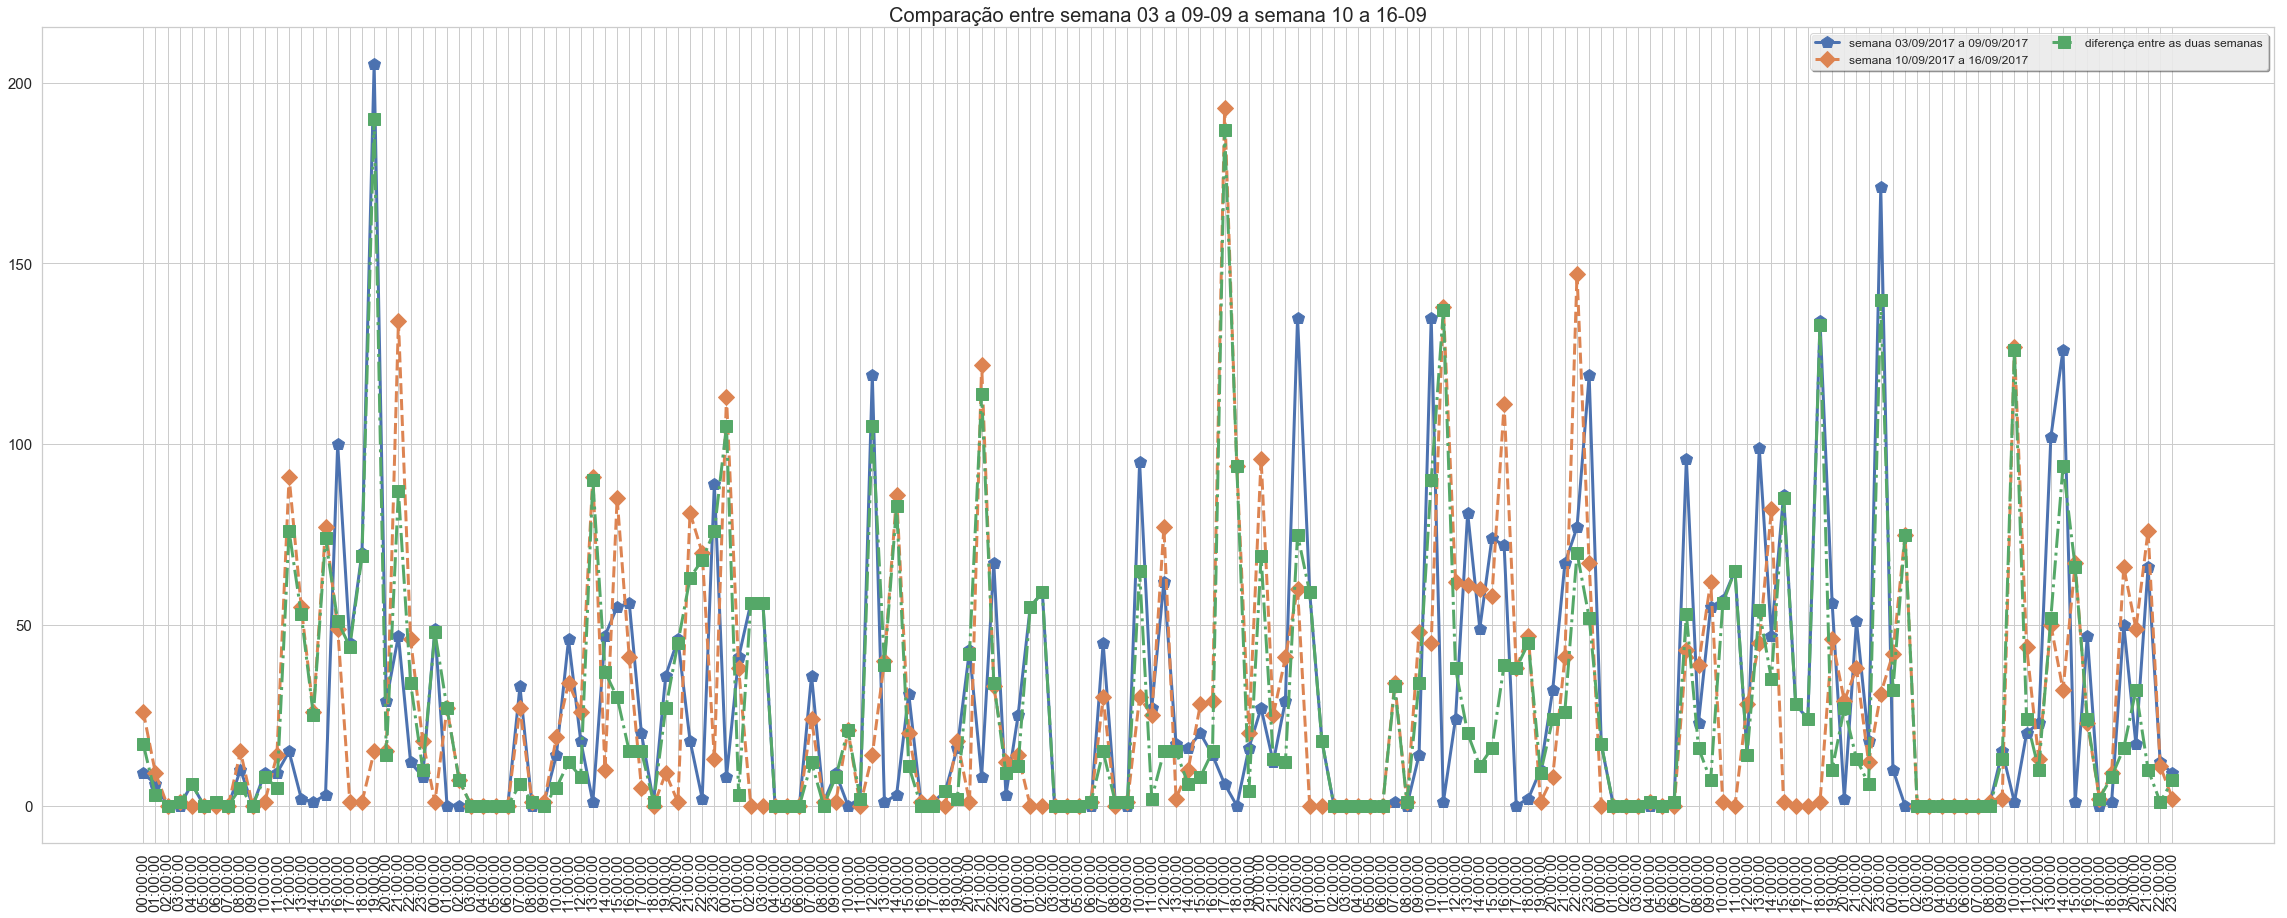

In [53]:
import datetime
tempo=df.loc[291:458,'Hora']
a= df.loc[291:458,'Consumo(litros)']#consumo 03-09; 09/09
b= df.loc[459:626,'Consumo(litros)']#consumo 10-09; 16/09
i=0
l=0
c=[]
d=[]
sub1=[]
tempo1=[]
while i< len(a) :
    c.append(a[291+i])
    i+=1
while l< len(b) :
    d.append(b[459+l])
    l+=1
for i in range(len(a)):
    sub = abs(c[i]-d[i])
    sub1.append(sub)
for i in tempo:
    tempo1.append(i)
#print(tempo1)
#print('Distancia Numpy {:.2f}' .format(dst))
#print(c)
#print(d)
#print(sub1)
#print(len(c))
#print(len(d))
#print(len(a))
#print(len(b))
plt.figure(figsize=(40,15))
plt.plot(c,marker='p',ls='-',linewidth=3, markersize=12)
plt.plot(d,marker='D',ls='--',linewidth=3, markersize=12)
plt.plot(sub1,marker='s',ls='-.',linewidth=3, markersize=12)
plt.xticks(np.arange(len(tempo1)),tempo1, rotation=90,fontsize='15')
plt.yticks(fontsize='15')
plt.title('Comparação entre semana 03 a 09-09 a semana 10 a 16-09',fontsize='20')
plt.legend(["semana 03/09/2017 a 09/09/2017", "semana 10/09/2017 a 16/09/2017",'diferença entre as duas semanas'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='12').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('comparação entre semana 03 a 09-09 a semana 10 a 16-09.png')

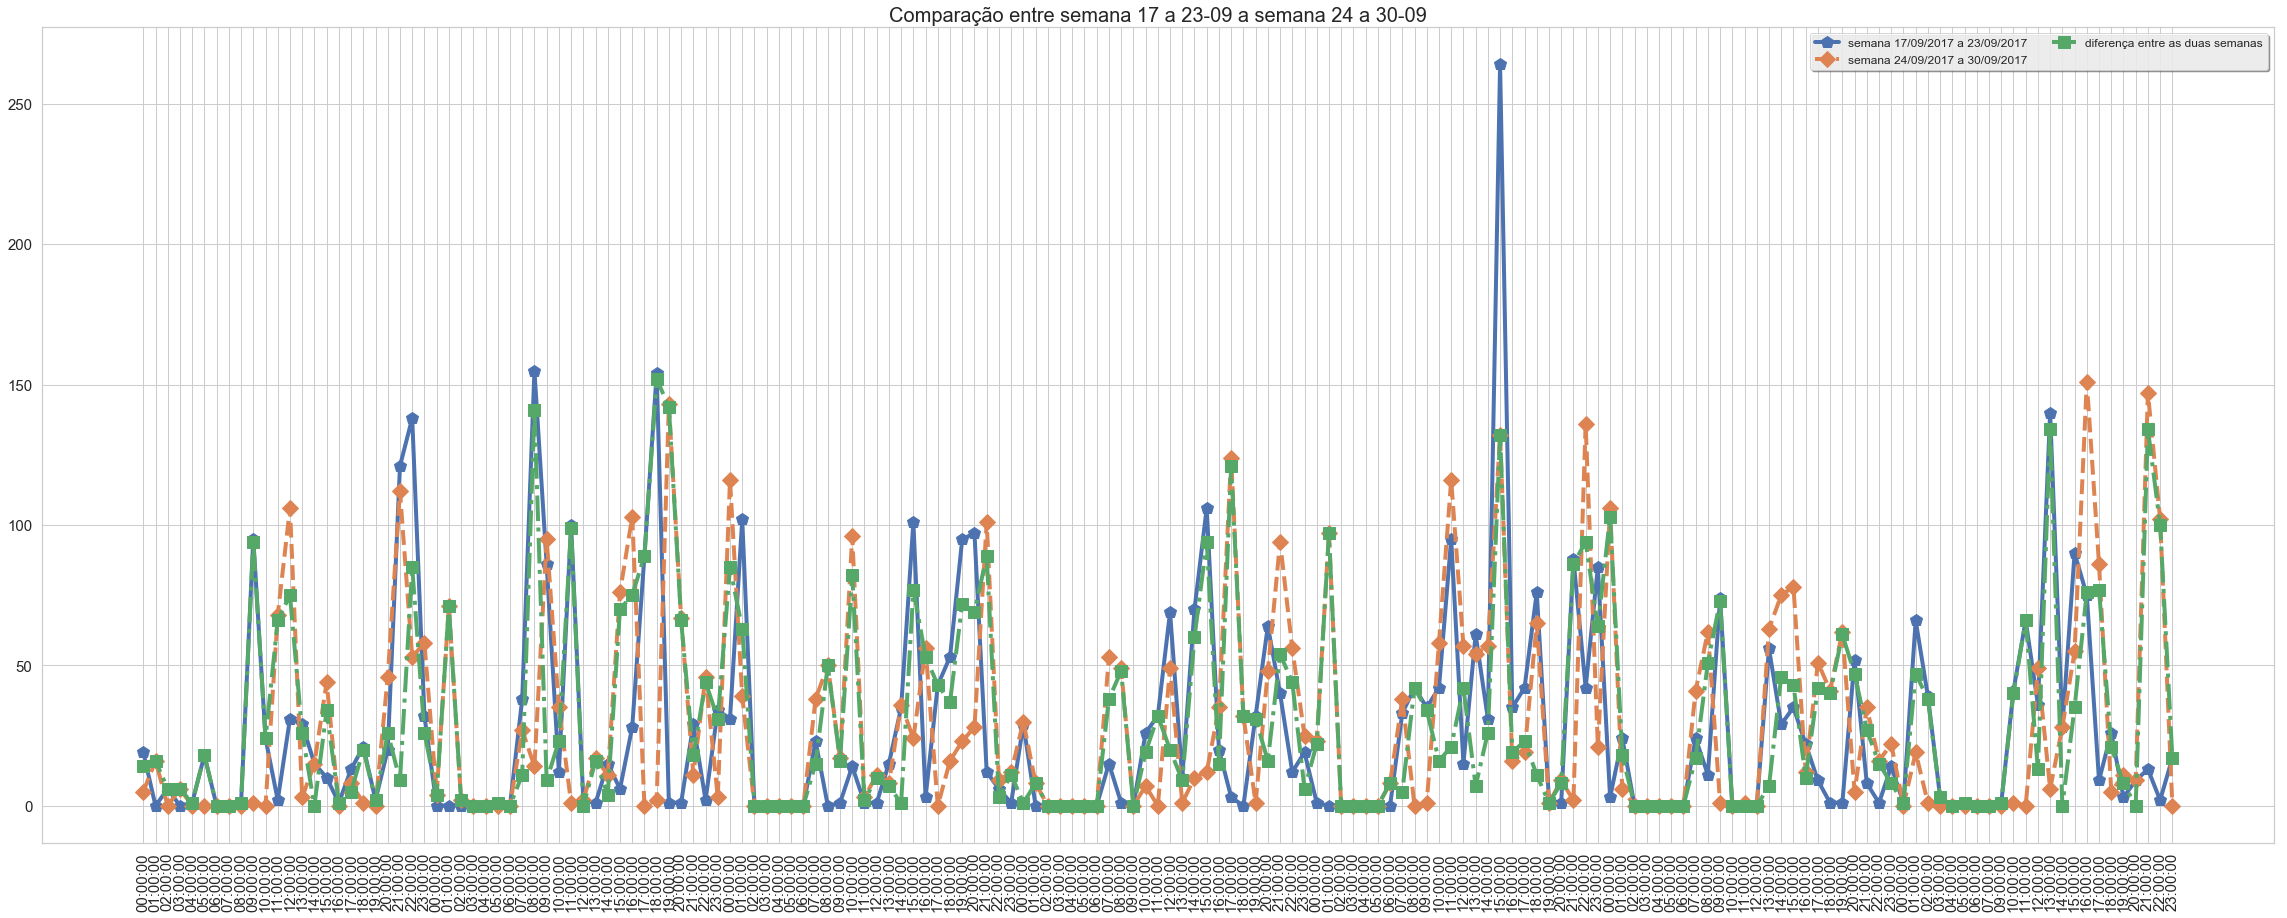

In [54]:
import datetime
tempo=df.loc[627:793,'Hora']
a= df.loc[627:793,'Consumo(litros)']#consumo 03-09; 09/09
b= df.loc[794:960,'Consumo(litros)']#consumo 10-09; 16/09
i=0
l=0
c=[]
d=[]
sub1=[]
tempo1=[]
while i< len(a) :
    c.append(a[627+i])
    i+=1
while l< len(b) :
    d.append(b[794+l])
    l+=1
for i in range(len(a)):
    sub = abs(c[i]-d[i])
    sub1.append(sub)
for i in tempo:
    tempo1.append(i)
#print(tempo1)
#print('Distancia Numpy {:.2f}' .format(dst))
#print(c)
#print(d)
#print(sub1)
#print(len(c))
#print(len(d))
#print(len(a))
#print(len(b))
plt.figure(figsize=(40,15))
plt.plot(c,marker='p',ls='-',linewidth=4, markersize=12)
plt.plot(d,marker='D',ls='--',linewidth=4, markersize=12)
plt.plot(sub1,marker='s',ls='-.',linewidth=4, markersize=12)
plt.xticks(np.arange(len(tempo1)),tempo1, rotation=90,fontsize='15')
plt.yticks(fontsize='15')
plt.title('Comparação entre semana 17 a 23-09 a semana 24 a 30-09',fontsize='20')
plt.legend(["semana 17/09/2017 a 23/09/2017", "semana 24/09/2017 a 30/09/2017",'diferença entre as duas semanas'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='12').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('comparação entre semana 17 a 23-09 a semana 24 a 30-09.png')

In [55]:
a= df.loc[794:960,'Data']
#print(a)
print((626-459)+626)
print(a.loc[960])

793
30-09-2017


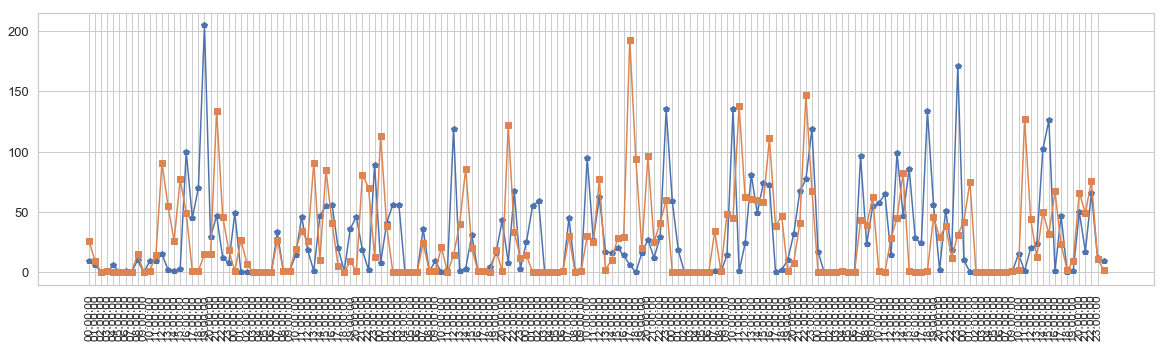

In [56]:

plt.figure(figsize=(20,5))
tempo=df.loc[627:793,'Hora']
tempo1=[]
for i in tempo:
    tempo1.append(i)
a=[]
b=[]
#for i in df.loc[627:793,'Consumo(litros)']:
 #   a.append(i)
for i in df.loc[459:626,'Consumo(litros)']:
    
    a.append(i)
for di in df.loc[291:458,'Consumo(litros)']:
    b.append(di)

#a= df.loc[627:793,'Consumo(litros)']#consumo 03-09; 09/09
#b= df.loc[794:960,'Consumo(litros)']#consumo 10-09; 16/09
plt.plot(b,marker='p')
plt.plot(a,marker='s')


#plt.plot(df.loc[459:626,'Hora'], df.loc[459:626,'Consumo(litros)'],marker='p')

plt.grid(True)
plt.xticks(np.arange(len(tempo1)),tempo1, rotation=90,fontsize='12')
plt.yticks(fontsize='13')
#plt.title('Grafico comparando os dias 26/08, 02/09, 09/09, 16/09 de 2017 (Sabados)',fontsize='15')
#plt.legend(["26-08-2017", "02-09-2017",'09-09-2017','16-09-2017'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='14').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('S.png')

plt.figure(figsize=(20,10))
x1=df.loc[291:458,'Hora']# hora 03-09; 09/09
y1=df.loc[291:458,'Consumo(litros)']# consumo 03-09; 09/09
x2=df.loc[459:626,'Hora']# hora 03-09; 09/09
y2=df.loc[459:626,'Consumo(litros)']# consumo 03-09; 09/09
plt.grid(True)
plt.xticks( rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.plot(x1,y1,marker='s')
plt.plot(x2,y2,marker='p')

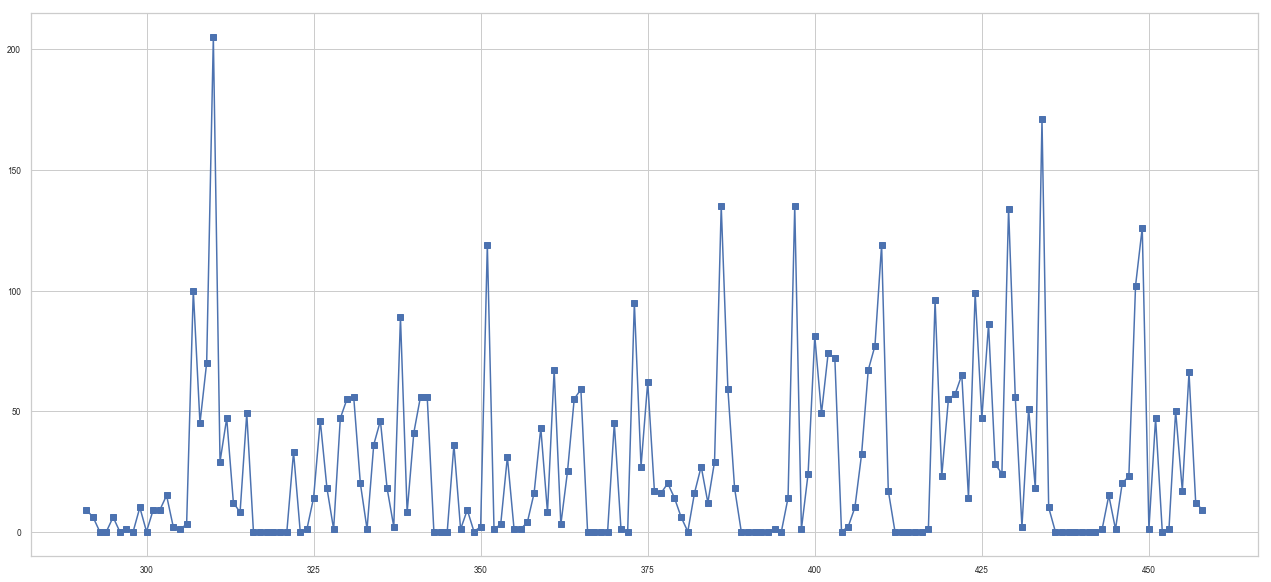

In [57]:
#(df['Consumo(litros)'][df['Data']=='03-09-2017']).plot(figsize=(22,10),grid=True ,marker='s')
tempo=df.loc[627:793,'Hora']
tempo1=[]
for i in tempo:
    tempo1.append(i)
df.loc[291:458,'Consumo(litros)'].plot(figsize=(22,10),grid=True ,marker='s')
#df.loc[459:626,'Consumo(litros)'].plot(figsize=(22,10),grid=True ,marker='p')
#plt.xticks(np.arange(len(tempo1)),tempo1, rotation=90,fontsize='12')

C:\Users\Natanael\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'rotation' is not defined

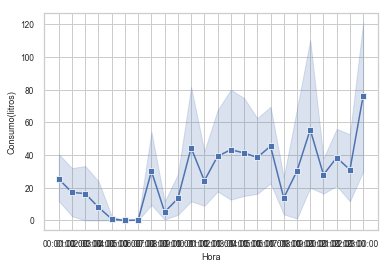

In [58]:
lm=sns.lineplot(x=df.loc[291:458,'Hora'], y=df.loc[291:458,'Consumo(litros)'],   data=df,marker='s')
lm.grid(True)

xticks=( rotation('45'),fontsize('13'))
#lm.yticks(fontsize='13')
fig = lm.get_figure()
fig.savefig('grafico_semana.png')

In [ ]:
df.loc[291:458,'Consumo(litros)'].plot(figsize=(20, 5), linewidth=4,grid=True,marker='s')
df.loc[459:626,'Consumo(litros)'].plot(figsize=(20, 5), linewidth=4,grid=True,marker='p')
plt.legend(loc='upper right');

In [ ]:
#sns.lineplot(x=df.loc[291:458,'Hora'], y=df.loc[291:458,'Consumo(litros)'],   data=df,marker='s')
fig, ax = plt.subplots(1,1, figsize=(12, 10))
lm2=sns.lineplot(data=df.loc[291:458,'Consumo(litros)'])
lm3=sns.lineplot(data=df.loc[459:626,'Consumo(litros)'])
lm2.grid(True)
lm2.legend(loc='best')
#lm2.title('Exemplo')


In [ ]:
df[df['Data']=='16-09-2017']

In [59]:
df.loc[555:578,'Consumo(litros)']

555      0
556      0
557      0
558      0
559      0
560      0
561      0
562     34
563      1
564     48
565     45
566    138
567     62
568     61
569     60
570     58
571    111
572     38
573     47
574      1
575      8
576     41
577    147
578     67
Name: Consumo(litros), dtype: int64

Distancia euclidiana entre as duas datas 22/08/2017 e 29/08/2017

Distancia euclidiana entre dados de duas datas 22/08/2017 e 29/08/2017

In [60]:
v1= df['Consumo(litros)'][df['Data']=='22-08-2017']
v2=df['Consumo(litros)'][df['Data']=='29-08-2017']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))
print('Distancia Numpy {:.2f}' .format(dist_euclidiana_np(v1, v2)))


Distancia Numpy 186.16
Distancia Numpy 186.16


In [61]:
a= df['Consumo(litros)'][df['Data']=='22-08-2017']
b= df['Consumo(litros)'][df['Data']=='29-08-2017']
dista = np.linalg.norm(a-b)
print('Distancia Numpy {:.2f}' .format(dista))
print('-*'*15)
from scipy.spatial import distance
dst = distance.euclidean(a, b)
print('Distancia Numpy {:.2f}' .format(dst))

Distancia Numpy nan
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Distancia Numpy 186.16


Distancia euclidiana entre dados de duas datas 29/08/2017 e 05/09/2017

In [62]:
v1= df['Consumo(litros)'][df['Data']=='29-08-2017']
v2=df['Consumo(litros)'][df['Data']=='05-09-2017']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))

Distancia Numpy 203.74


Distancia euclidiana entre as duas datas 29/08/2017 e 05/09/2017

In [63]:
v1= df['Consumo(litros)'][df['Data']=='29-08-2017']
v2=df['Consumo(litros)'][df['Data']=='05-09-2017']
from scipy.spatial import distance
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

Distancia Euclidiana 203.74


df.loc[0:170,'Consumo(litros)']

Distancia euclidiana entre as semanas 22/08/2017 - 28/08/2017 e 29/08/2017 - 04/09/2017

In [64]:
v1=df.loc[3:170,'Consumo(litros)']
v2=df.loc[171:337,'Consumo(litros)']
from scipy.spatial import distance
#print(f'distanci euclidiana\n{v1}')
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

Distancia Euclidiana 569.87


In [65]:
v1=df.loc[3:170,'Consumo(litros)']
v2=df.loc[171:337,'Consumo(litros)']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))
print('Distancia Numpy {:.2f}' .format(dist_euclidiana_np(v1, v2)))

Distancia Numpy 569.87
Distancia Numpy 569.87


In [66]:
df['Data'][df['Data']=='01-03-2018'].head()

2600    01-03-2018
2601    01-03-2018
2602    01-03-2018
2603    01-03-2018
2604    01-03-2018
Name: Data, dtype: object

In [67]:
df['Data'][df['Data']=='30-03-2018'].tail()

3268    30-03-2018
3269    30-03-2018
3270    30-03-2018
3271    30-03-2018
3272    30-03-2018
Name: Data, dtype: object

In [68]:
df['Data'][df['Data']=='01-04-2018'].head()

3295    01-04-2018
3296    01-04-2018
3297    01-04-2018
3298    01-04-2018
3299    01-04-2018
Name: Data, dtype: object

In [69]:
df['Data'][df['Data']=='30-04-2018'].tail()

3963    30-04-2018
3964    30-04-2018
3965    30-04-2018
3966    30-04-2018
3967    30-04-2018
Name: Data, dtype: object

Distancia euclidiana entre as semanas 01/03/2018 - 30/03/2018 e 01/04/2018 - 30/07/2018

In [70]:
v1=df.loc[2600:3272,'Consumo(litros)']
v2=df.loc[3295:3967,'Consumo(litros)']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))
print('Distancia Numpy {:.2f}' .format(dist_euclidiana_np(v1, v2)))

Distancia Numpy 1417.35
Distancia Numpy 1417.35


In [71]:

from scipy.spatial import distance
#print(f'distanci euclidiana\n{v1}')
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

Distancia Euclidiana 1417.35


In [72]:
df['Consumo(litros)'][df['Data']=='26-08-2017'].count()

24

df['Consumo(litros)'][[df['Data'][df['Semana']=='Monday']]]

In [73]:
df['Data'][df['Semana']=='Monday'].head()

147    28-08-2017
148    28-08-2017
149    28-08-2017
150    28-08-2017
151    28-08-2017
Name: Data, dtype: object

In [74]:
df_teste=df['Consumo(litros)'][df['Semana']=='Monday']==df['Data'][df['Semana']=='Monday']

In [75]:
df_teste.head()

147    False
148    False
149    False
150    False
151    False
dtype: bool

In [76]:
df['Data'][df['Semana']=='Monday']==df['Data'][df['Semana']=='Monday']

147     True
148     True
149     True
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157     True
158     True
159     True
160     True
161     True
162     True
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
315     True
316     True
317     True
318     True
319     True
320     True
        ... 
3810    True
3811    True
3812    True
3813    True
3814    True
3815    True
3816    True
3945    True
3946    True
3947    True
3948    True
3949    True
3950    True
3951    True
3952    True
3953    True
3954    True
3955    True
3956    True
3957    True
3958    True
3959    True
3960    True
3961    True
3962    True
3963    True
3964    True
3965    True
3966    True
3967    True
Name: Data, Length: 565, dtype: bool